# Tensorflow Learning
## www.elecwizard.ir
### chapter 3
#### Placeholders

So far we have used Variables to manage our data, but there is a more basic structure, the placeholder. A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders.



In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
from scipy import misc
import tensorflow as tf
# First, load the image

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 In the following example, we create a 3 by 2 matrix, and store some numbers in it. We then use the same operation as before to do element-wise doubling of the numbers.



In [5]:
x=tf.placeholder('float',shape=[None,3])
y=x*2
with tf.Session( ) as sess:
    x_data=([[1,2,3],[4,5,6]])
    result=sess.run(y,feed_dict={x:x_data})
    print(result)

[[  2.   4.   6.]
 [  8.  10.  12.]]


The first dimension of the placeholder is None, meaning we can have any number of rows. The second dimension is fixed at 3, meaning each row needs to have three columns of data.

We can extend this to take an arbitrary number of None dimensions. In this example, we load up the image from our last lesson, then create a placeholder that stores a slice of that image. The slice is a 2D segment of the image, but each “pixel” has three components (red, green, blue). Therefore, we need None for the first two dimensions, but need 3 (or None would work) for the last dimension. We then use TensorFlow’s slice method to take a subsegment out of the image to operate on.



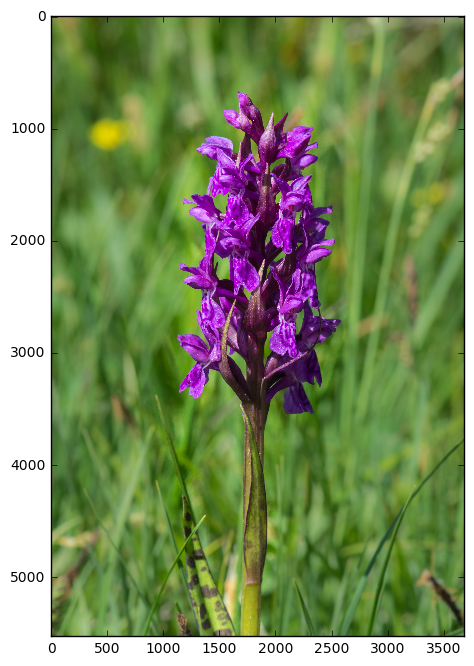

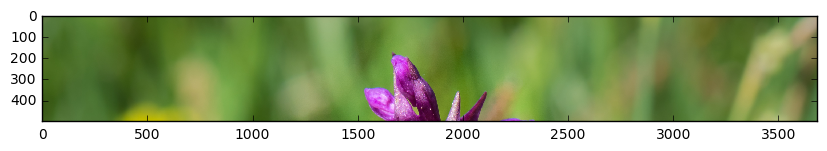

In [10]:
image = misc.imread('/home/reza/DeepLearning/Tensorflow/MarshOrchid.jpg')
# Print out its 
plt.imshow(image)
plt.show()

img=tf.placeholder('uint8', shape=[None,None,3])
slic=tf.slice(img,[500,0,0],[500,-1,-1])

with tf.Session( ) as sess:
    x_data=([[1,2,3],[4,5,6]])
    result=sess.run(slic,feed_dict={img:image})
plt.imshow(result)
plt.show()